<a href="https://colab.research.google.com/github/sonalshreya/Machine-Learning/blob/main/HW0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
print(cancer.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
import pandas as pd
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

See the specific column

In [8]:
df['mean radius']

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: mean radius, Length: 569, dtype: float64

In [9]:
print(df['mean radius'].head(5))

0    17.99
1    20.57
2    19.69
3    11.42
4    20.29
Name: mean radius, dtype: float64


In [10]:
df[99:100]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
99,14.42,19.77,94.48,642.5,0.09752,0.1141,0.09388,0.05839,0.1879,0.0639,...,16.33,30.86,109.5,826.4,0.1431,0.3026,0.3194,0.1565,0.2718,0.09353


In [11]:
df.iloc[99]

mean radius                 14.420000
mean texture                19.770000
mean perimeter              94.480000
mean area                  642.500000
mean smoothness              0.097520
mean compactness             0.114100
mean concavity               0.093880
mean concave points          0.058390
mean symmetry                0.187900
mean fractal dimension       0.063900
radius error                 0.289500
texture error                1.851000
perimeter error              2.376000
area error                  26.850000
smoothness error             0.008005
compactness error            0.028950
concavity error              0.033210
concave points error         0.014240
symmetry error               0.014620
fractal dimension error      0.004452
worst radius                16.330000
worst texture               30.860000
worst perimeter            109.500000
worst area                 826.400000
worst smoothness             0.143100
worst compactness            0.302600
worst concav

In [12]:
row_count=len(df)
print(row_count)

569


In [15]:
row_count = df.shape
print(row_count)

(569, 30)


Each row in the dataset corresponds to each patient with assosiated features related to dataset.
Each column corresponds to the features or attribute of that data. Fo example -(mean_radius) is feature and it corresponds to the mean_radius of the tumour for each person.

In [16]:
malignant_cases=sum(cancer.target==0)
print(malignant_cases)

212


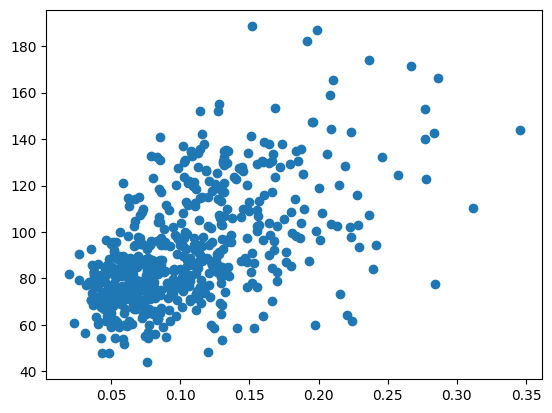

In [17]:
from matplotlib import pyplot as plt
plt.scatter(df['mean compactness'],df['mean perimeter'])
plt.show()

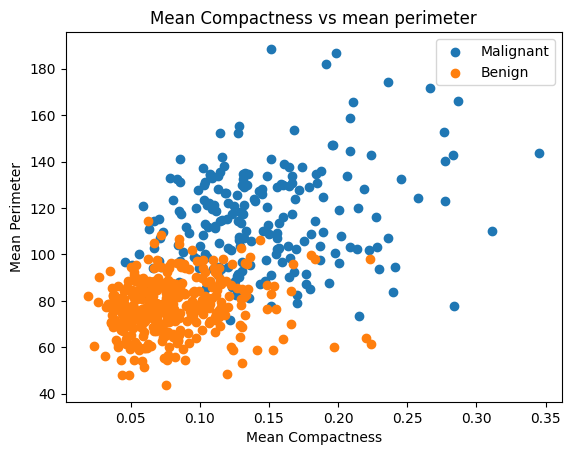

In [31]:
plt.scatter(df[cancer.target==0]['mean compactness'],df[cancer.target==0]['mean perimeter'],label='Malignant')
plt.scatter(df[cancer.target==1]['mean compactness'],df[cancer.target==1]['mean perimeter'],label='Benign')

plt.xlabel('Mean Compactness')
plt.ylabel('Mean Perimeter')
plt.title('Mean Compactness vs mean perimeter')
plt.legend()

plt.show()


<ipython-input-39-fca0233c7ba5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['target']=cancer.target


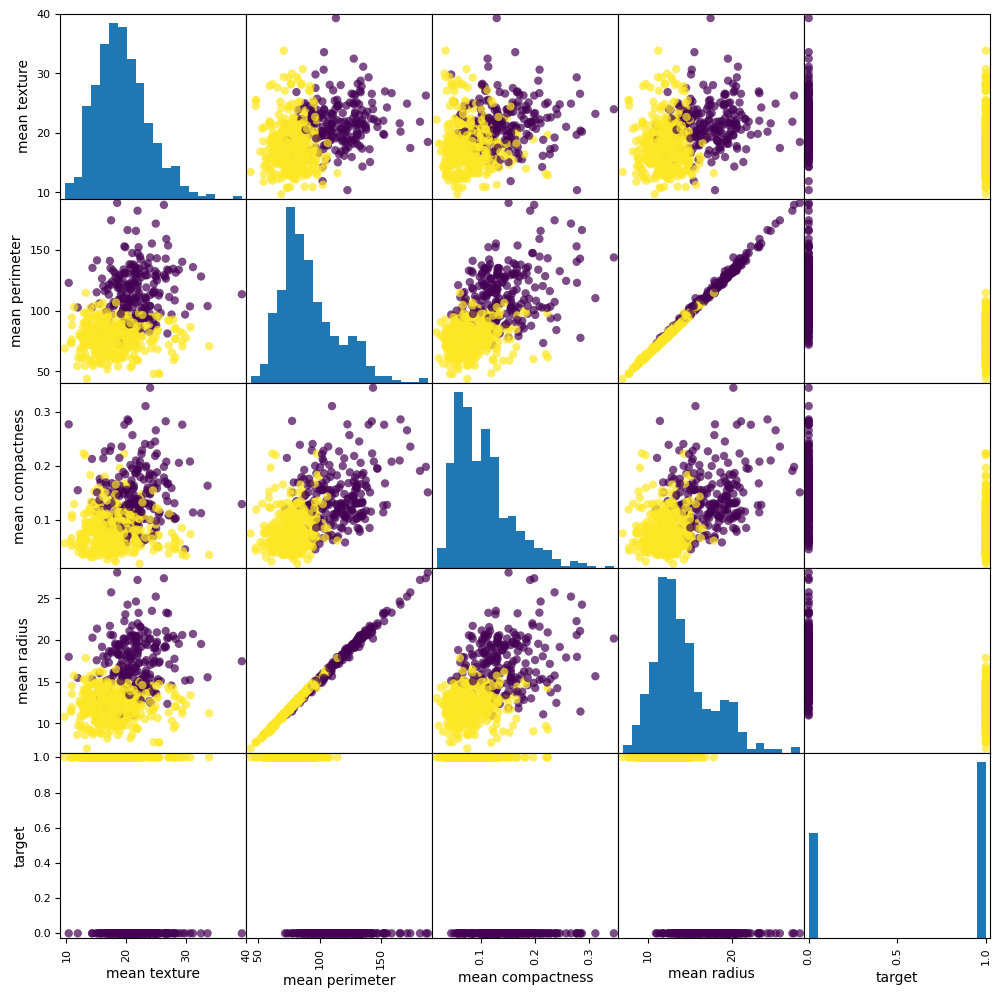

In [39]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

selected_columns=['mean texture', 'mean perimeter', 'mean compactness','mean radius']
selected_df=df[selected_columns]
selected_df['target']=cancer.target
scatter_matrix(selected_df, c=selected_df['target'], figsize=(12, 12), marker='o', hist_kwds={'bins': 20}, alpha=0.7)
plt.show()

Correlation is often visible in scatterplots by observing whether points tend to form a clear pattern, like a straight line. If two features are particularly correlated, one might notice that changes in one feature are associated with systematic changes in another feature.

If you notice strong positive correlation (points forming an upward-sloping line) or strong negative correlation (points forming a downward-sloping line), it suggests a relationship between those features. This could be due to underlying biological or physical factors that make these features related in some way.

Here those two features are: mean perimeter and mean radius